In [13]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.metric.metric import MetricCalculator
from mesostat.utils.hdf5_io import DataStorage
from mesostat.stat.connectomics import offdiag_1D

from lib.sych.data_fc_db import DataFCDatabase
from lib.sych.metric_helper import metric_by_session

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data'] = '/media/alyosha/Data/TE_data/yarodata/neuro'

#params['root_path_paw']   = gui_fpath("Path to Paw data",         params['root_path_data'])
#params['root_path_lick']  = gui_fpath("Path to Lick data",        params['root_path_paw'])
#params['root_path_whisk'] = gui_fpath("Path to Whisk Data",       params['root_path_lick'])
# params['root_path_te']    = gui_fpath("Select TE results folder", params['root_path_data'])

In [4]:
dataDB = DataFCDatabase(params)

Target trial within [0, 8] sec. Total target timesteps 161
Searching for channel labels
Searching for data files
No paw path provided, skipping
No lick path provided, skipping
No whisk path provided, skipping


In [5]:
dataDB.read_te_files()
dataDB.read_neuro_files()
dataDB.read_resample_paw_files()
dataDB.read_resample_lick_files()   # Currently does not work. Ask Yaro if we need it
dataDB.read_resample_whisk_files()

No TE files loaded, skipping reading part


IntProgress(value=0, description='Read Neuro Data:', max=220)

Calculated performance 0.7264150943396226 does not match external 0.7333333333333333
Calculated performance 0.803680981595092 does not match external 0.808641975308642
Calculated performance 0.8411764705882353 does not match external 0.8436578171091446
Calculated performance 0.956989247311828 does not match external 0.9621621621621622
Calculated performance 0.6808510638297872 does not match external 0.6956521739130435
Calculated performance 0.9582366589327146 does not match external 0.9604651162790697
Calculated performance 0.4851258581235698 does not match external 0.4840182648401826
--Warning: For iMISS behaviour max index 437 exceeds nTrials 437
---Cropped excessive behaviour trials from 86 to 85
Calculated performance 0.42795389048991356 does not match external 0.6902017291066282
Calculated performance 0.2534562211981567 does not match external 0.30386740331491713
Calculated performance 0.4444444444444444 does not match external 0.47227191413237923
Calculated performance 0.56680161

--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyos

In [6]:
pTHR = 0.7
dataDB.mark_days_expert_naive(pTHR)

# Multi-Regional Metrics

* Measures of temporal relations
    - CrossCorrelation
    - CrossMI
    
### Questions of Interest

* Effect of baseline normalization:
    - raw data
    - ZScore raw channel by session (zscoreDim='rs')
    - ZScore raw channel by trial (zscoreDim='s')
    - pre-trial interval normalization
* Dynamic connectivity:
    - macro (whole-trial)
    - window-sweep
    - phases
* Performance constraints
    - All vs iGO/iNOGO
* Interpretation, Significance
* Lag predictions
    
### Extended Questions
    
* Effects if CaInd forwards model. Relaxed Deconvolution of some sort?
* Do connections contain unique info compared to activities?
    - Can predict connection from average activity of 1 node? of both nodes?


## Cross-correlation

In [7]:
mc = MetricCalculator(serial=False, verbose=False)

In [8]:
ds = DataStorage('sych_population_connectivity.h5')

In [9]:
maxLag = 10
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    metric_by_session(dataDB, mc, ds, mousename, 'crosscorr', '',
                      sweepSettings={'lag' : np.arange(maxLag)})

IntProgress(value=0, description='mtp_1', max=9)

IntProgress(value=0, description='mtp_10', max=8)

IntProgress(value=0, description='mtp_11', max=12)

IntProgress(value=0, description='mtp_12', max=24)

IntProgress(value=0, description='mtp_13', max=12)

IntProgress(value=0, description='mtp_15', max=13)

IntProgress(value=0, description='mtp_16', max=13)

IntProgress(value=0, description='mtp_2', max=8)

IntProgress(value=0, description='mtp_7', max=18)

IntProgress(value=0, description='mvg_2', max=11)

IntProgress(value=0, description='mvg_3', max=8)

IntProgress(value=0, description='mvg_4', max=11)

IntProgress(value=0, description='mvg_5', max=9)

IntProgress(value=0, description='mvg_6', max=9)

IntProgress(value=0, description='mvg_7', max=18)

IntProgress(value=0, description='mvg_8', max=15)

IntProgress(value=0, description='mvg_9', max=21)

In [ ]:
maxLag = 5
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    metric_by_session(dataDB, mc, ds, mousename, 'cross_MI', '',
                      sweepSettings={'lag' : np.arange(maxLag)})

IntProgress(value=0, description='mtp_1', max=9)

IntProgress(value=0, description='mtp_10', max=8)

IntProgress(value=0, description='mtp_11', max=12)

IntProgress(value=0, description='mtp_12', max=24)

IntProgress(value=0, description='mtp_13', max=12)

IntProgress(value=0, description='mtp_15', max=13)

IntProgress(value=0, description='mtp_16', max=13)

IntProgress(value=0, description='mtp_2', max=8)

IntProgress(value=0, description='mtp_7', max=18)

IntProgress(value=0, description='mvg_2', max=11)

IntProgress(value=0, description='mvg_3', max=8)

IntProgress(value=0, description='mvg_4', max=11)

In [22]:
def plot_lag_hist_by_mouse(dataDB, ds, dsetName, plotNameSuffix=''):
    nPlot = len(dataDB.mice)
    fig, ax = plt.subplots(ncols=nPlot, figsize=(4*nPlot, 4))
    
    resultDF = ds.list_dsets_pd()
    for iMouse, mousename in enumerate(sorted(dataDB.mice)):
        # Get data
        queryDict = {"mousename" : mousename, "name" : dsetName}
        data, attrs = ds.get_data_recent_by_query(queryDict, listDF=resultDF)
        shapeLabels = attrs['target_dim']
        
        # Average over sessions
        rezMean = np.mean(data, axis=0)
        rezMean = np.array([offdiag_1D(r) for r in rezMean])
        rezArgMax = np.argmax(np.abs(rezMean), axis=0)
        rezMax = np.max(np.abs(rezMean), axis=0)

        thrCut = np.quantile(rezMax, 0.8)
        idxCut = rezMax > thrCut

        print(mousename, np.min(data), np.max(data))

        ax[iMouse].set_title(mousename + ' @ corr > ' + str(np.round(thrCut, 2)))
    #     ax[iMouse].plot(rezMax[idxCut], rezArgMax[idxCut], '.')
        ax[iMouse].hist(rezArgMax[idxCut], bins=np.arange(maxLag)-0.5, density=True)
        ax[iMouse].set_ylim([0, 1])
    plt.show()

mtp_1 0.09508974251491768 1.0
mtp_10 -0.14811059239513746 1.0
mtp_11 -0.19049216097093766 1.0
mtp_12 -0.1557806430450566 1.0
mtp_13 -0.5561148745492303 1.0
mtp_15 -0.2631272265528195 1.0
mtp_16 -0.5347875458332799 1.0
mtp_2 -0.17166525449084707 1.0
mtp_7 -0.26217840565744244 1.0
mvg_2 -0.049865736935088986 1.0
mvg_3 -0.0026386921837426875 1.0
mvg_4 -0.5011759225616591 1.0
mvg_5 -0.08071196124750195 1.0
mvg_6 -0.09705920111951605 1.0
mvg_7 -0.7425525212105943 1.0
mvg_8 -0.8417376364723872 1.0
mvg_9 -0.2438454121962237 1.0


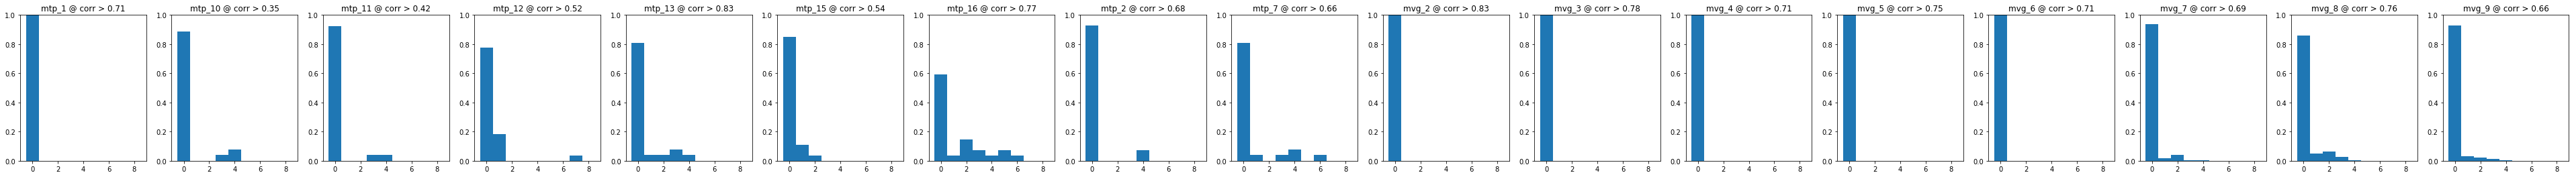

In [23]:
plot_lag_hist_by_mouse(dataDB, ds, "crosscorr")